In [4]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
df = pd.read_csv('./dataset/data.csv',encoding='unicode_escape')

In [5]:
display(df.head())
df.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [66]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,1,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,2011-01-18,1,-77183.6


In [60]:
freq[freq['CustomerID']==12985.0]

,CustomerID,frequency
495,12985.0,78


In [38]:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate']).dt.date


# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype('Int64')
df_recent_order = df.groupby(['CustomerID'])['rank'].max().reset_index(name='max_rank')
df_rec = df.merge(df_recent_order,left_on=['CustomerID','rank'],right_on=['CustomerID','max_rank'],how='inner')

# ### alternative method:
# df_recent_order = df.groupby(['CustomerID'])['Date'].max().reset_index(name='recent_date')
# df_rec = df.merge(df_recent_order,left_on=['CustomerID','Date'],right_on=['CustomerID','recent_date'],how='inner')

df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,max_rank
0,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,12/1/2010 9:53,6.45,18074.0,United Kingdom,2010-12-01,1,1
1,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,12/1/2010 9:53,0.65,18074.0,United Kingdom,2010-12-01,1,1
2,536384,22464,HANGING METAL HEART LANTERN,12,12/1/2010 9:53,1.65,18074.0,United Kingdom,2010-12-01,1,1
3,536384,21324,HANGING MEDINA LANTERN SMALL,6,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1
4,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1


In [58]:
df_rec['Date']= pd.to_datetime(df_rec['Date'])
df_rec['recency'] = (df_rec['Date'] - min(df_rec['Date']) ).dt.days
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,max_rank,recency
0,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,12/1/2010 9:53,6.45,18074.0,United Kingdom,2010-12-01,1,1,0
1,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,12/1/2010 9:53,0.65,18074.0,United Kingdom,2010-12-01,1,1,0
2,536384,22464,HANGING METAL HEART LANTERN,12,12/1/2010 9:53,1.65,18074.0,United Kingdom,2010-12-01,1,1,0
3,536384,21324,HANGING MEDINA LANTERN SMALL,6,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1,0
4,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1,0


In [62]:
freq = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='frequency')
freq.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [63]:
rec_freq = df_rec.merge(freq,on='CustomerID',how='inner')
rec_freq.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,max_rank,recency,frequency
0,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,12/1/2010 9:53,6.45,18074.0,United Kingdom,2010-12-01,1,1,0,1
1,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,12/1/2010 9:53,0.65,18074.0,United Kingdom,2010-12-01,1,1,0,1
2,536384,22464,HANGING METAL HEART LANTERN,12,12/1/2010 9:53,1.65,18074.0,United Kingdom,2010-12-01,1,1,0,1
3,536384,21324,HANGING MEDINA LANTERN SMALL,6,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1,0,1
4,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,12/1/2010 9:53,2.95,18074.0,United Kingdom,2010-12-01,1,1,0,1


In [64]:
df['total'] = df['Quantity']*df['UnitPrice']
m = df.groupby('CustomerID')['total'].sum().reset_index(name='monetary_value')

In [65]:
rfm = m.merge(rec_freq,on='CustomerID',how='inner')
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]
finaldf.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,2,0.0
1,12346.0,48,2,0.0
2,12347.0,371,7,4310.0
3,12347.0,371,7,4310.0
4,12347.0,371,7,4310.0


recency: 


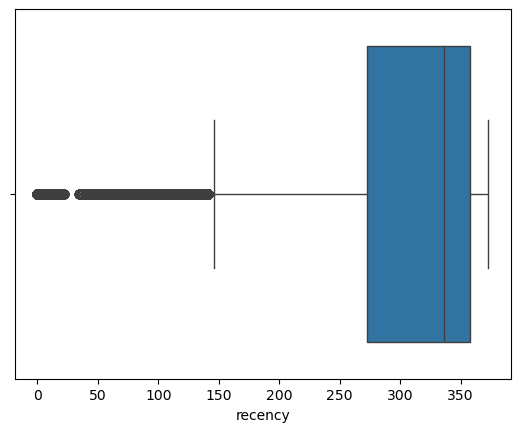

frequency: 


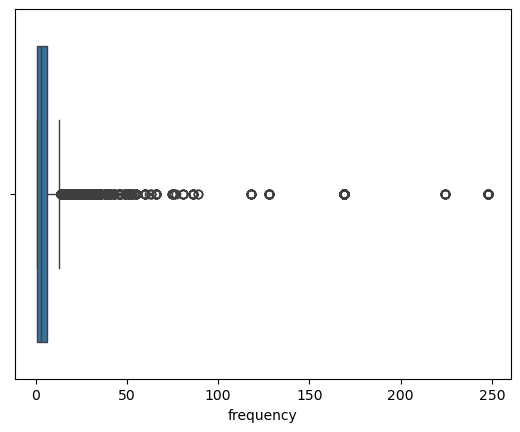

monetary_value: 


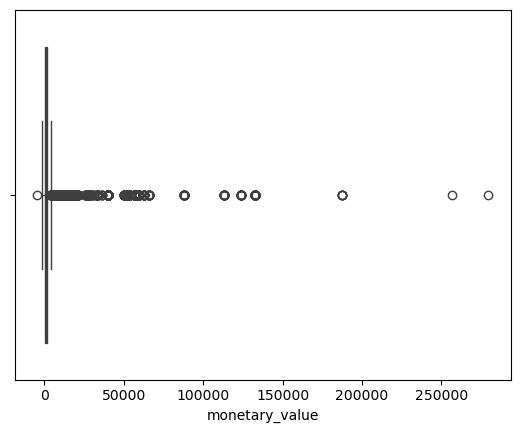

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [68]:

from scipy import stats

# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']].copy()
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

recency: 


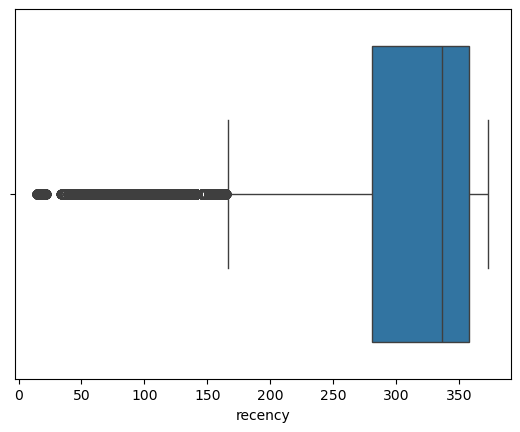

frequency: 


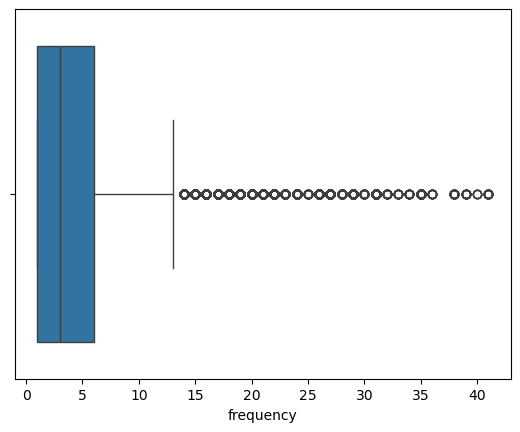

monetary_value: 


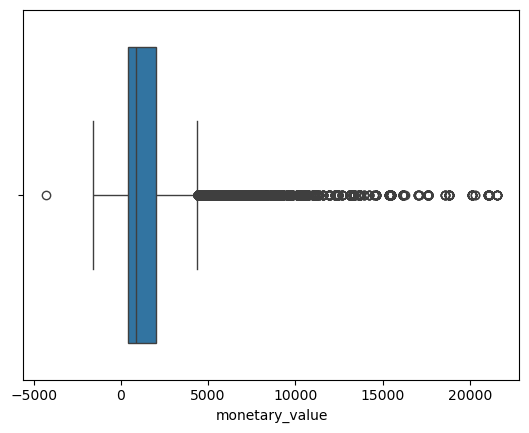

In [74]:
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=new_df[str(i)])
    plt.show()

In [75]:
print(new_df.shape)
new_df = new_df.drop_duplicates()
print(new_df.shape)

(87416, 3)
(4220, 3)


In [78]:
features

,recency,frequency,monetary_value
0,48,2,0.00
2,371,7,4310.00
13,298,4,1797.24
16,355,1,1757.55
89,63,1,334.40
...,...,...,...
90530,96,1,180.60
90540,193,1,80.82
90547,366,3,176.60
90552,370,16,2094.88


In [79]:
features_t

array([[-2.59068847, -0.48432362, -0.66598298],
       [ 0.90719852,  0.47540857,  1.41835031],
       [ 0.1166544 , -0.10043074,  0.2031695 ],
       ...,
       [ 0.85305166, -0.29237718, -0.58057851],
       [ 0.89636915,  2.2029265 ,  0.3471094 ],
       [ 0.47402366, -0.29237718,  0.222533  ]])

In [77]:
from sklearn.preprocessing import StandardScaler

new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features_t = scaler.transform(features.values)
scaled_features = pd.DataFrame(features_t, columns = col_names)

Text(0, 0.5, 'Inertia')

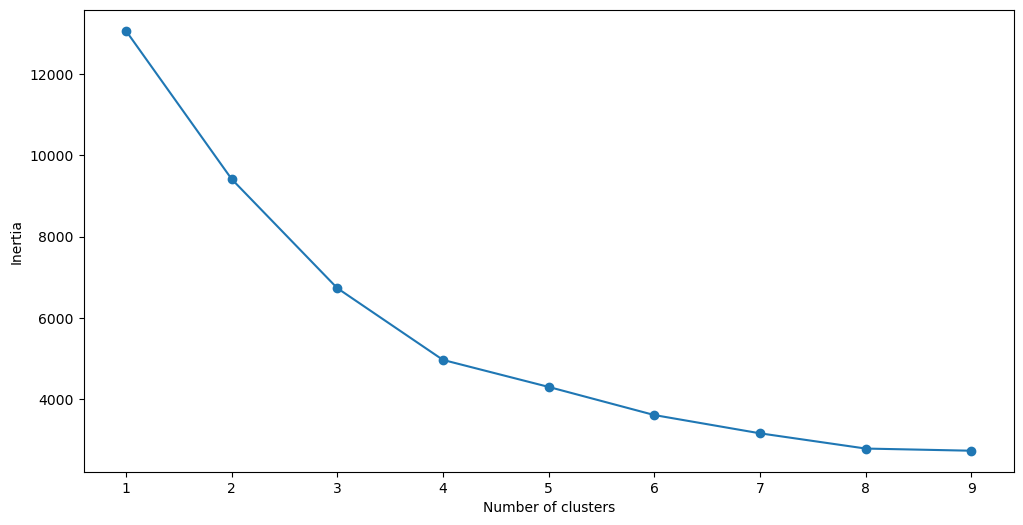

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [28]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4362867682133738


In [29]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

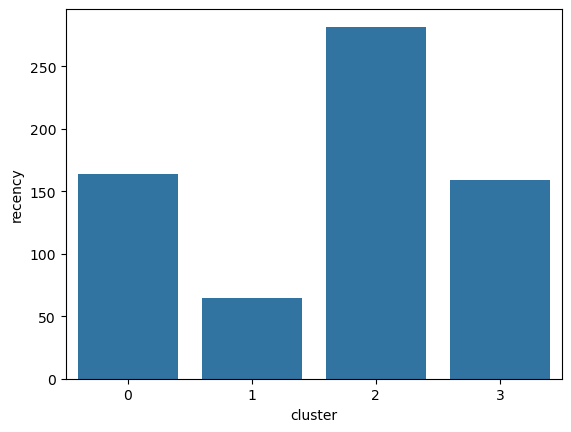

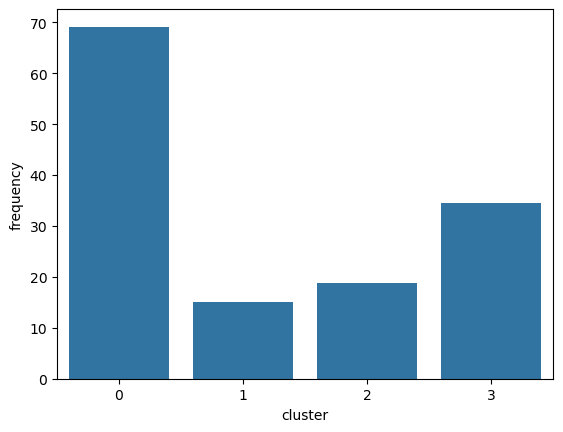

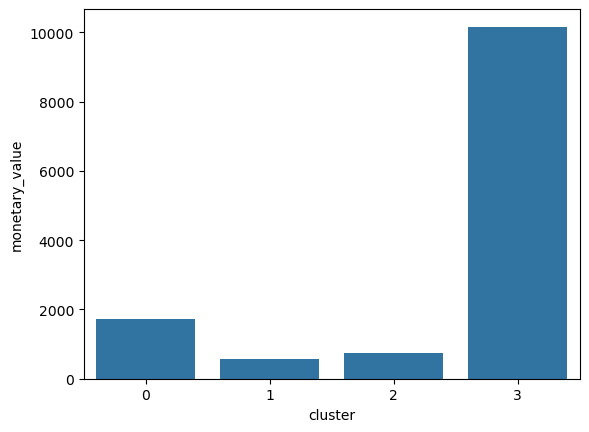

In [30]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()